To demonstrate how to load raw drone images from a folder to create a dataloader
--

In [1]:
from tree_detection_framework.preprocessing.preprocessing import (
    create_image_dataloader,
    visualize_dataloader,
    save_dataloader_contents,
)

/ofo-share/repos-amritha/conda/envs/tree-detection-framework/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


2024-12-17 20:24:25,308 - INFO - Units set in PIXELS


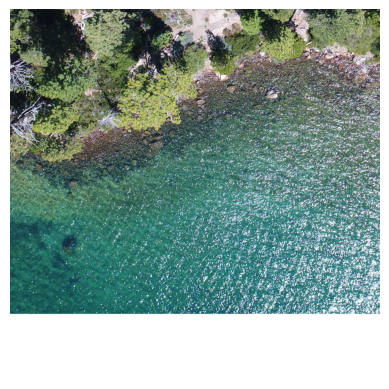

In [2]:
tile_dataloader = create_image_dataloader(
    "/ofo-share/emerald-point-benchmark/100MEDIA",
    chip_size=2000,
    chip_stride=1000,
    batch_size=3,
)

# Random visualization
visualize_dataloader(tile_dataloader, 1)

Visualize how the tiles are split along with metadata

[{'image_index': 0, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=0.0, maxx=2000.0, miny=0.0, maxy=2000.0, mint=0.0, maxt=9.223372036854776e+18)}, {'image_index': 1, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=1000.0, maxx=3000.0, miny=0.0, maxy=2000.0, mint=0.0, maxt=9.223372036854776e+18)}, {'image_index': 2, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=2000.0, maxx=4000.0, miny=0.0, maxy=2000.0, mint=0.0, maxt=9.223372036854776e+18)}]


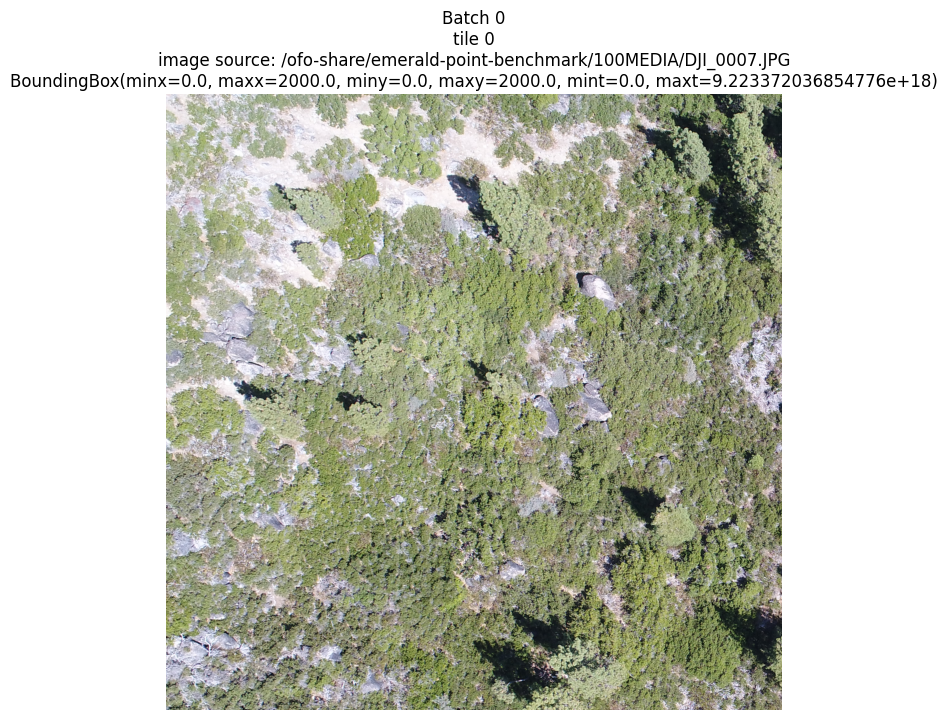

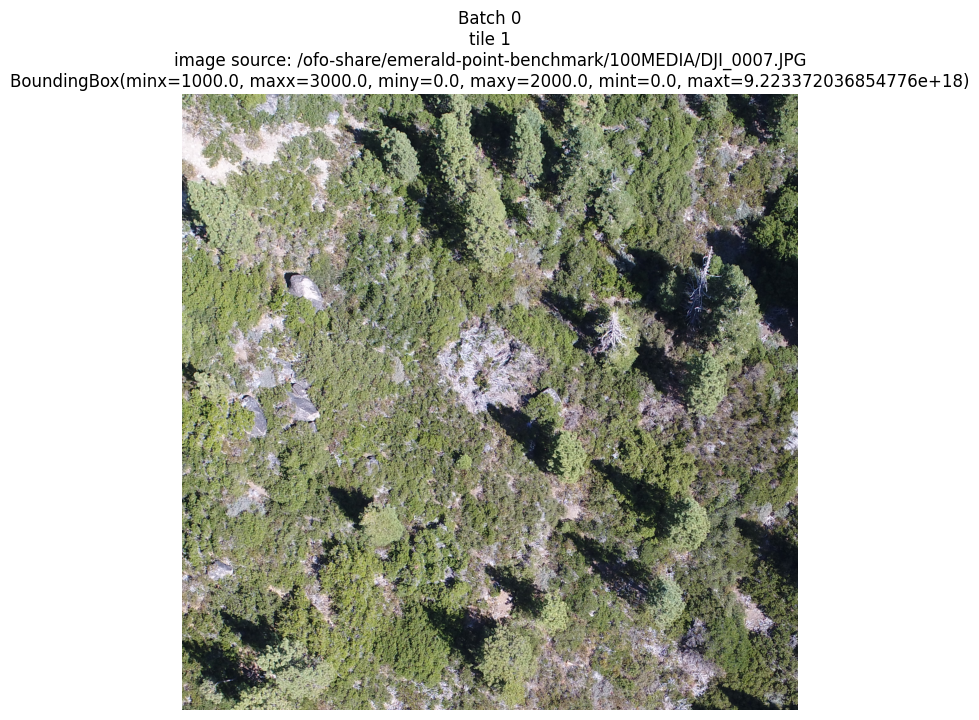

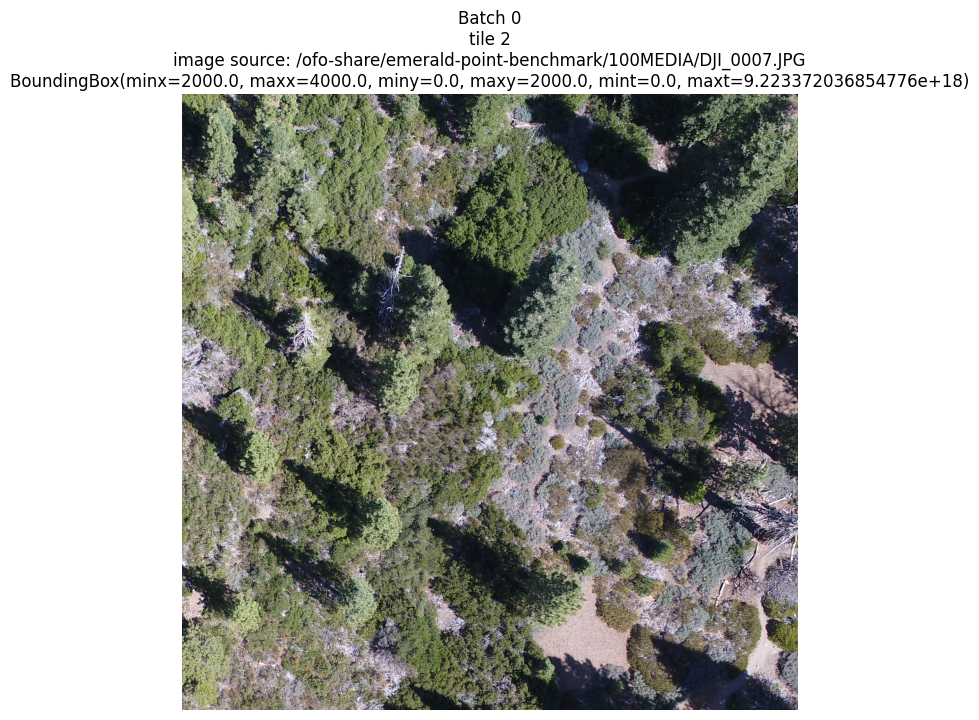

[{'image_index': 3, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=3000.0, maxx=4864.0, miny=0.0, maxy=2000.0, mint=0.0, maxt=9.223372036854776e+18)}, {'image_index': 4, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=4000.0, maxx=4864.0, miny=0.0, maxy=2000.0, mint=0.0, maxt=9.223372036854776e+18)}, {'image_index': 5, 'source_image': '/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG', 'bounds': BoundingBox(minx=0.0, maxx=2000.0, miny=1000.0, maxy=3000.0, mint=0.0, maxt=9.223372036854776e+18)}]


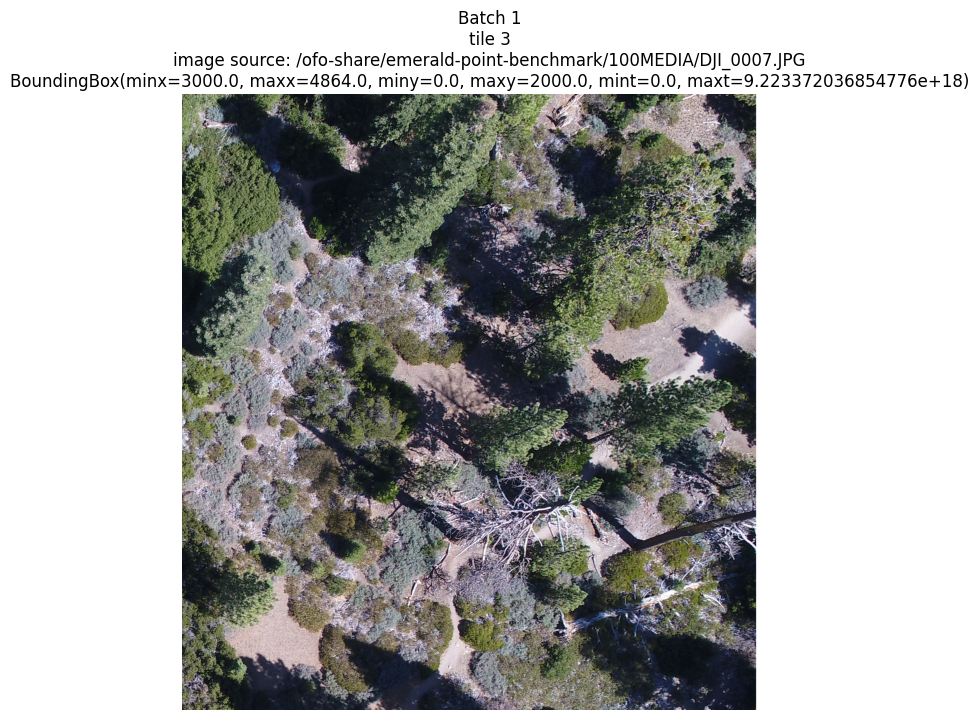

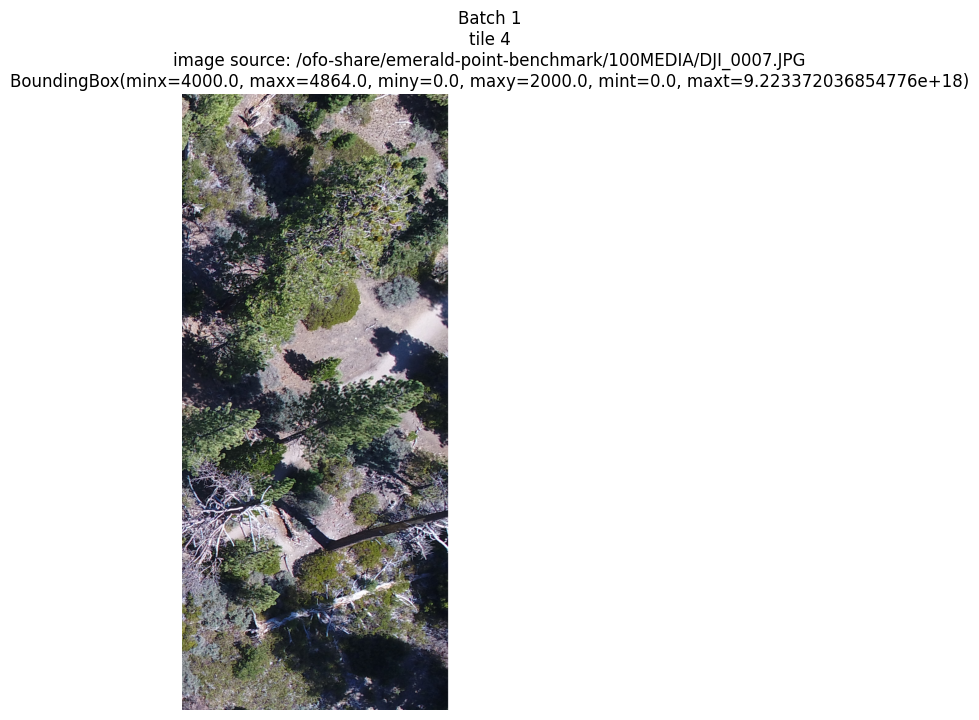

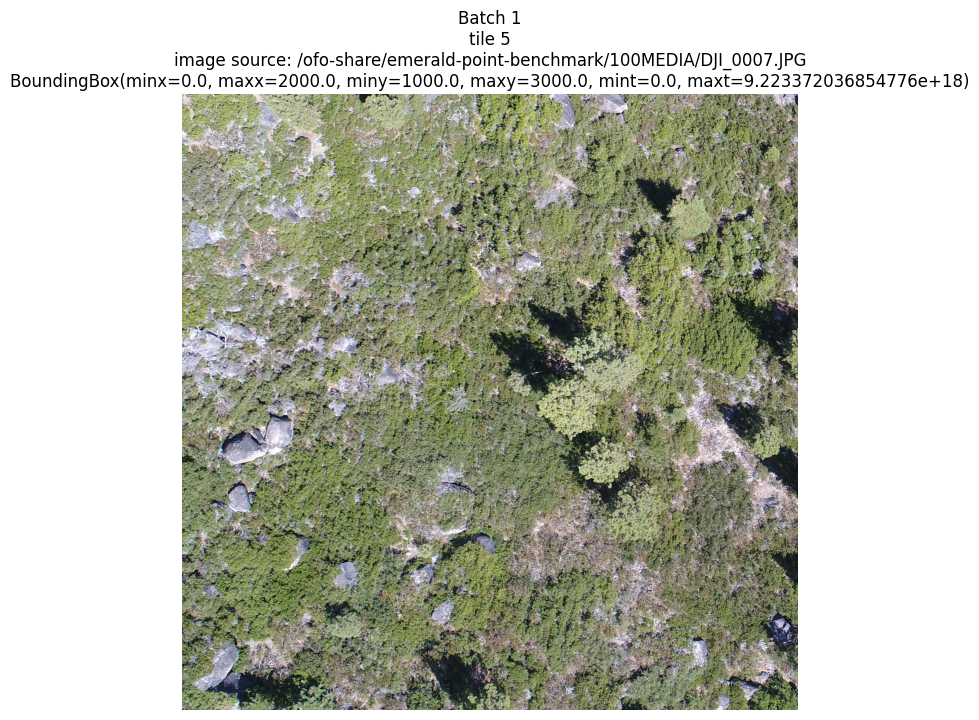

In [5]:
import matplotlib.pyplot as plt

for batch_idx, batch in enumerate(tile_dataloader):
    # Show first 2 batches
    if batch_idx in [0, 1]:
        tiles = batch["image"]
        metadata = batch["metadata"]
        print(metadata)

        for idx, tile in enumerate(tiles):
            fig, ax = plt.subplots(figsize=(8, 8))
            image_np = tile.permute(1, 2, 0).numpy()

            ax.imshow(image_np)
            ax.set_title(
                f"Batch {batch_idx}\ntile {metadata[idx]['image_index']}\nimage source: {metadata[idx]['source_image']}\n{metadata[idx]['bounds']}"
            )
            ax.axis("off")

            plt.show()
    if batch_idx == 1:
        break

Original image from which the batch tiles were created:
--

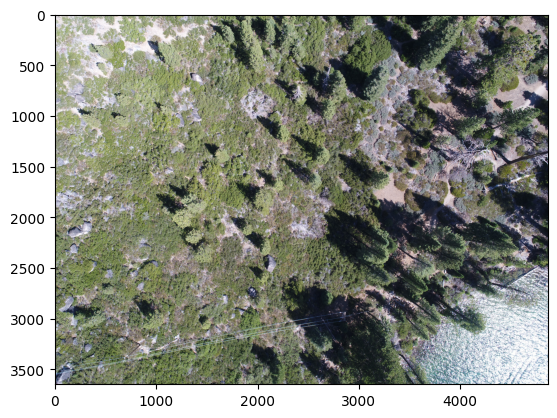

In [8]:
from PIL import Image

full_image = Image.open("/ofo-share/emerald-point-benchmark/100MEDIA/DJI_0007.JPG")
plt.imshow(full_image)